<h1><center>CSEN1022:Assignment 1</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Marwan Ayman Hamid Ismail

GUC-ID: 40-16368

Elective Tutorial No.: 3

**Member 2**

Name:Fakhreldin Hussein Soliman

GUC-ID:43-11215

Elective Tutorial No.: T1

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [2]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data (Edit)

In [37]:
# return (x_train, y_train), (x_test, y_test)
# from google.colab import files
# uploaded = files.upload()
# !unzip Data.zip
# Read Training Images, Testing Images, Training Labels, Testing Labels
#train = np.array([plt.imread('Data/train/'+str(i)+'.jpg').reshape(-1) for i in range (1,2401)])
#test = np.array([plt.imread('test/'+str(i)+'.jpg').reshape(-1) for i in range (1,201)])
#train_labels = np.loadtxt('Train/Training Labels.txt')
#test_labels = np.loadtxt('Test/Test Labels.txt')
#print(train.shape, test.shape)
#print(train_labels.shape,test_labels.shape)

<hr style="border:2px solid black"> </hr>

## Construct Fischer's Linear Discriminant classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [38]:
# Write code here
train_airplane_x = (np.array([plt.imread('Data/train/airplane/'+str(i)+'.jpg').reshape(-1) for i in range (0,5000)])/255)
train_frog_x = (np.array([plt.imread('Data/train/frog/'+str(i)+'.jpg').reshape(-1) for i in range (0,5000)])/255)
train_automobile_x = (np.array([plt.imread('Data/train/automobile/'+str(i)+'.jpg').reshape(-1) for i in range (0,5000)])/255)
#print(len(train_airplane_x))
#vertical = np.concatenate((image_1, image_2), axis = 0)
train_not_airplane_x= np.concatenate((train_frog_x,train_automobile_x),  axis=0)
train_not_frog_x=np.concatenate((train_airplane_x,train_automobile_x),  axis=0)
train_not_automobile_x=np.concatenate((train_frog_x,train_airplane_x),  axis=0)
print(len(train_not_airplane_x), len(train_not_frog_x), len(train_not_automobile_x))
###reshaping into  M * N WHERE M no. images ,and N no. pixels
train_not_airplane_x=train_not_airplane_x.reshape(10000,-1)
train_not_frog_x=train_not_frog_x.reshape(10000,-1)
train_not_automobile_x=train_not_automobile_x.reshape(10000,-1)

train_airplane_x=train_airplane_x.reshape(5000,-1)
train_frog_x=train_frog_x.reshape(5000,-1)
train_automobile_x=train_automobile_x.reshape(5000,-1)
print(train_airplane_x.size)

# Train
#AIRPLANE
mean_airplane=np.mean(train_airplane_x,axis=0).reshape(-1,1)
mean_not_airplane=np.mean(train_not_airplane_x,axis=0).reshape(-1,1)
#FROG
mean_frog    =np.mean(train_frog_x,axis=0).reshape(-1,1)
mean_not_frog    =np.mean(train_not_frog_x,axis=0).reshape(-1,1)
#AUTOMOBILE means
mean_automobile    =np.mean(train_automobile_x,axis=0).reshape(-1,1)
mean_not_automobile    =np.mean(train_not_automobile_x,axis=0).reshape(-1,1)
Sw_Airplane=(train_airplane_x - mean_airplane.reshape((3072,)) ).T@(train_airplane_x - mean_airplane.reshape((3072,)) )
Sw_Frog=(train_frog_x - mean_frog.reshape((3072,)) ).T@(train_frog_x - mean_frog.reshape((3072,)) )
Sw_Automobile=(train_automobile_x - mean_automobile.reshape((3072,)) ).T@(train_automobile_x - mean_automobile.reshape((3072,)) )

Sw_Not_Airplane=(train_not_airplane_x - mean_not_airplane.reshape((3072,)) ).T@(train_not_airplane_x - mean_not_airplane.reshape((3072,)) )
Sw_Not_Frog=(train_not_frog_x - mean_not_frog.reshape((3072,)) ).T@(train_not_frog_x - mean_not_frog.reshape((3072,)) )
Sw_Not_Automobile=(train_not_automobile_x - mean_not_automobile.reshape((3072,)) ).T@(train_not_automobile_x - mean_not_automobile.reshape((3072,)) )
print(Sw_Frog.shape) 
print(Sw_Automobile.shape) 

Sw_airplane_inv=np.linalg.inv(Sw_Airplane+Sw_Not_Airplane)
Sw_frog_inv=np.linalg.inv(Sw_Frog+Sw_Not_Frog)
Sw_automobile_inv=np.linalg.inv(Sw_Automobile+Sw_Not_Automobile)
#AIRPLANE
classifier_Airplane=Sw_airplane_inv@(mean_airplane-mean_not_airplane)
W0_Airplane=(classifier_Airplane.T @ (-0.5*(mean_airplane +mean_not_airplane)))[0][0]
#FROG
classifierFrog=Sw_frog_inv@(mean_frog-mean_not_frog)
W0_Frog=(classifierFrog.T @ (-0.5*(mean_frog +mean_not_frog)))[0][0]
#AUTOMOBILE
classifierAutomobile=Sw_automobile_inv@(mean_automobile-mean_not_automobile) 
W0_Automobile=(classifierAutomobile.T @ (-0.5*(mean_automobile +mean_not_automobile)))[0][0]


10000 10000 10000
15360000
(3072, 3072)
(3072, 3072)


In [5]:
test_air = np.array([plt.imread('Data/Test/airplane/'+str(i)+'.jpg').reshape(-1)/255 for i in range (0,1000)])
test_frog = np.array([plt.imread('Data/Test/frog/'+str(i)+'.jpg').reshape(-1)/255 for i in range (0,1000)])
test_auto = np.array([plt.imread('Data/Test/automobile/'+str(i)+'.jpg').reshape(-1)/255 for i in range (0,1000)])

In [4]:
test_air

array([[0.55294118, 0.62352941, 0.70196078, ..., 0.19215686, 0.28235294,
        0.25098039],
       [0.36078431, 0.48235294, 0.59607843, ..., 0.36470588, 0.4627451 ,
        0.58039216],
       [0.97647059, 0.98431373, 0.96470588, ..., 0.96470588, 0.97254902,
        0.95294118],
       ...,
       [0.68627451, 0.74117647, 0.69019608, ..., 0.38823529, 0.38431373,
        0.31372549],
       [0.57647059, 0.62745098, 0.65882353, ..., 0.34901961, 0.4627451 ,
        0.48627451],
       [0.44705882, 0.55294118, 0.76862745, ..., 0.01960784, 0.        ,
        0.        ]])

In [6]:
test_air

array([[0.55294118, 0.62352941, 0.70196078, ..., 0.19215686, 0.28235294,
        0.25098039],
       [0.36078431, 0.48235294, 0.59607843, ..., 0.36470588, 0.4627451 ,
        0.58039216],
       [0.97647059, 0.98431373, 0.96470588, ..., 0.96470588, 0.97254902,
        0.95294118],
       ...,
       [0.68627451, 0.74117647, 0.69019608, ..., 0.38823529, 0.38431373,
        0.31372549],
       [0.57647059, 0.62745098, 0.65882353, ..., 0.34901961, 0.4627451 ,
        0.48627451],
       [0.44705882, 0.55294118, 0.76862745, ..., 0.01960784, 0.        ,
        0.        ]])

In [40]:
car_air = 0
air_air = 0
frog_air = 0
for pic in range(1000):
    res = []
    res = np.concatenate((res,((classifier_Airplane).T@test_air[pic])+W0_Airplane,((classifierAutomobile).T@test_air[pic])+W0_Automobile,((classifierFrog).T@test_air[pic])+W0_Frog))
    if res[0]>res[1]:
        if res[0]>res[2]:
            air_air+=1
    if res[1]>res[0]:
        if res[1]>res[2]:
            car_air+=1
    if res[2]>res[1]:
        if res[2]>res[0]:
            frog_air+=1
print(air_air,car_air,frog_air)

767 127 106


In [41]:
car_auto = 0
air_auto = 0
frog_auto = 0
for pic in range(1000):
    res = []
    res = np.concatenate((res,((classifier_Airplane).T@test_auto[pic])+W0_Airplane,((classifierAutomobile).T@test_auto[pic])+W0_Automobile,((classifierFrog).T@test_auto[pic])+W0_Frog))
    if res[0]>res[1]:
        if res[0]>res[2]:
            air_auto+=1
    if res[1]>res[0]:
        if res[1]>res[2]:
            car_auto+=1
    if res[2]>res[1]:
        if res[2]>res[0]:
            frog_auto+=1
print(air_auto,car_auto,frog_auto)

190 670 140


In [42]:
car_frog = 0
air_frog = 0
frog_frog = 0
for pic in range(1000):
    res = []
    res = np.concatenate((res,((classifier_Airplane).T@test_frog[pic])+W0_Airplane,((classifierAutomobile).T@test_frog[pic])+W0_Automobile,((classifierFrog).T@test_frog[pic])+W0_Frog))
    if res[0]>res[1]:
        if res[0]>res[2]:
            air_frog+=1
    if res[1]>res[0]:
        if res[1]>res[2]:
            car_frog+=1
    if res[2]>res[1]:
        if res[2]>res[0]:
            frog_frog+=1
print(air_frog,car_frog,frog_frog)

85 124 791


In [43]:
confusion_matrix = np.array(([air_air,car_air,frog_air],[air_auto,car_auto,frog_auto],[air_frog,car_frog,frog_frog]))
print(confusion_matrix)

[[767 127 106]
 [190 670 140]
 [ 85 124 791]]


## Confusion Matrix (Don't Edit)

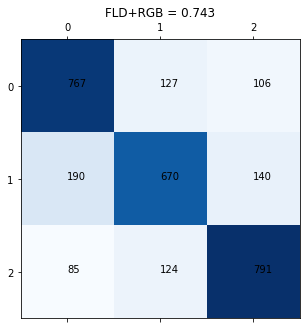

In [44]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/3000
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+RGB = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

### Repeat for Grayscale

In [3]:
train_airplane_gray = (np.array([plt.imread('Data/train/airplane/'+str(i)+'.jpg').reshape(-1) for i in range (0,5000)])/255)
train_frog_gray = (np.array([plt.imread('Data/train/frog/'+str(i)+'.jpg').reshape(-1) for i in range (0,5000)])/255)
train_automobile_gray = (np.array([plt.imread('Data/train/automobile/'+str(i)+'.jpg').reshape(-1) for i in range (0,5000)])/255)

In [5]:
t

(5000, 3072)

In [46]:
new_air_gray = []
new_air_row = []
for pic in range(5000):
    for pixel in range(1024):
        new_air_row.append(train_airplane_gray[pic][0+(3*pixel)]*0.3+train_airplane_gray[pic][1+(3*pixel)]*0.59+train_airplane_gray[pic][2+(3*pixel)]*0.11)
    new_air_gray.append(new_air_row)
    new_air_row = []

In [47]:
new_auto_gray = []
new_auto_row = []
for pic in range(5000):
    for pixel in range(1024):
        new_auto_row.append(train_automobile_gray[pic][0+(3*pixel)]*0.3+train_automobile_gray[pic][1+(3*pixel)]*0.59+train_automobile_gray[pic][2+(3*pixel)]*0.11)
    new_auto_gray.append(new_auto_row)
    new_auto_row = []

In [48]:
new_frog_gray = []
new_frog_row = []
for pic in range(5000):
    for pixel in range(1024):
        new_frog_row.append(train_frog_gray[pic][0+(3*pixel)]*0.3+train_frog_gray[pic][1+(3*pixel)]*0.59+train_frog_gray[pic][2+(3*pixel)]*0.11)
    new_frog_gray.append(new_frog_row)
    new_frog_row = []
print(len(new_air_gray[0]))

1024


In [49]:
train_not_airplane_gray= np.concatenate((new_frog_gray,new_auto_gray),  axis=0)
train_not_frog_gray=np.concatenate((new_air_gray,new_auto_gray),  axis=0)
train_not_automobile_gray=np.concatenate((new_frog_gray,new_air_gray),  axis=0)
train_not_airplane_gray=train_not_airplane_gray.reshape(10000,-1)
train_not_frog_gray=train_not_frog_gray.reshape(10000,-1)
train_not_automobile_gray=train_not_automobile_gray.reshape(10000,-1)
new_air_gray=np.array(new_air_gray).reshape(5000,-1)
new_frog_gray=np.array(new_frog_gray).reshape(5000,-1)
new_auto_gray=np.array(new_auto_gray).reshape(5000,-1)


In [50]:
# Train
#AIRPLANE
mean_airplane=np.mean(new_air_gray,axis=0).reshape(-1,1)
mean_not_airplane=np.mean(train_not_airplane_gray,axis=0).reshape(-1,1)
#FROG
mean_frog    =np.mean(new_frog_gray,axis=0).reshape(-1,1)
mean_not_frog    =np.mean(train_not_frog_gray,axis=0).reshape(-1,1)
#AUTOMOBILE means
mean_automobile    =np.mean(new_auto_gray,axis=0).reshape(-1,1)
mean_not_automobile    =np.mean(train_not_automobile_gray,axis=0).reshape(-1,1)
Sw_Airplane=(new_air_gray - mean_airplane.reshape((1024,)) ).T@(new_air_gray - mean_airplane.reshape((1024,)) )
Sw_Frog=(new_frog_gray - mean_frog.reshape((1024,)) ).T@(new_frog_gray - mean_frog.reshape((1024,)) )
Sw_Automobile=(new_auto_gray - mean_automobile.reshape((1024,)) ).T@(new_auto_gray - mean_automobile.reshape((1024,)) )

Sw_Not_Airplane=(train_not_airplane_gray - mean_not_airplane.reshape((1024,)) ).T@(train_not_airplane_gray - mean_not_airplane.reshape((1024,))) 
Sw_Not_Frog=(train_not_frog_gray - mean_not_frog.reshape((1024,)) ).T@(train_not_frog_gray - mean_not_frog.reshape((1024,)) )
Sw_Not_Automobile=(train_not_automobile_gray - mean_not_automobile.reshape((1024,)) ).T@(train_not_automobile_gray - mean_not_automobile.reshape((1024,)) )


Sw_airplane_inv=np.linalg.inv(Sw_Airplane+Sw_Not_Airplane)
Sw_frog_inv=np.linalg.inv(Sw_Frog+Sw_Not_Frog)
Sw_automobile_inv=np.linalg.inv(Sw_Automobile+Sw_Not_Automobile)
#AIRPLANE
classifier_Airplane=Sw_airplane_inv@(mean_airplane-mean_not_airplane)
W0_Airplane=(classifier_Airplane.T @ (-0.5*(mean_airplane +mean_not_airplane)))[0][0]
#FROG
classifierFrog=Sw_frog_inv@(mean_frog-mean_not_frog)
W0_Frog=(classifierFrog.T @ (-0.5*(mean_frog +mean_not_frog)))[0][0]
#AUTOMOBILE
classifierAutomobile=Sw_automobile_inv@(mean_automobile-mean_not_automobile) 
W0_Automobile=(classifierAutomobile.T @ (-0.5*(mean_automobile +mean_not_automobile)))[0][0]

In [51]:
test_air_gray = np.array([plt.imread('Data/Test/airplane/'+str(i)+'.jpg').reshape(-1)/255 for i in range (0,1000)])
test_frog_gray = np.array([plt.imread('Data/Test/frog/'+str(i)+'.jpg').reshape(-1)/255 for i in range (0,1000)])
test_auto_gray = np.array([plt.imread('Data/Test/automobile/'+str(i)+'.jpg').reshape(-1)/255 for i in range (0,1000)])

In [52]:
new_air_gray_t = []
new_air_row = []
for pic in range(1000):
    for pixel in range(1024):
        new_air_row.append(test_air_gray[pic][0+(3*pixel)]*0.3+test_air_gray[pic][1+(3*pixel)]*0.59+test_air_gray[pic][2+(3*pixel)]*0.11)
    new_air_gray_t.append(new_air_row)
    new_air_row = []

In [53]:
new_auto_gray_t = []
new_auto_row = []
for pic in range(1000):
    for pixel in range(1024):
        new_auto_row.append(test_auto_gray[pic][0+(3*pixel)]*0.3+test_auto_gray[pic][1+(3*pixel)]*0.59+test_auto_gray[pic][2+(3*pixel)]*0.11)
    new_auto_gray_t.append(new_auto_row)
    new_auto_row = []

In [54]:
new_frog_gray_t = []
new_frog_row = []
for pic in range(1000):
    for pixel in range(1024):
        new_frog_row.append(test_frog_gray[pic][0+(3*pixel)]*0.3+test_frog_gray[pic][1+(3*pixel)]*0.59+test_frog_gray[pic][2+(3*pixel)]*0.11)
    new_frog_gray_t.append(new_frog_row)
    new_frog_row = []

In [55]:
car_air = 0
air_air = 0
frog_air = 0
for pic in range(1000):
    res = []
    res = np.concatenate((res,((classifier_Airplane).T@new_air_gray_t[pic])+W0_Airplane,((classifierAutomobile).T@new_air_gray_t[pic])+W0_Automobile,((classifierFrog).T@new_air_gray_t[pic])+W0_Frog))
    if res[0]>res[1]:
        if res[0]>res[2]:
            air_air+=1
    if res[1]>res[0]:
        if res[1]>res[2]:
            car_air+=1
    if res[2]>res[1]:
        if res[2]>res[0]:
            frog_air+=1
print(air_air,car_air,frog_air)

676 131 193


TypeError: '<' not supported between instances of 'str' and 'int'

In [56]:
car_auto = 0
air_auto = 0
frog_auto = 0
for pic in range(1000):
    res = []
    res = np.concatenate((res,((classifier_Airplane).T@new_auto_gray_t[pic])+W0_Airplane,((classifierAutomobile).T@new_auto_gray_t[pic])+W0_Automobile,((classifierFrog).T@new_auto_gray_t[pic])+W0_Frog))
    if res[0]>res[1]:
        if res[0]>res[2]:
            air_auto+=1
    if res[1]>res[0]:
        if res[1]>res[2]:
            car_auto+=1
    if res[2]>res[1]:
        if res[2]>res[0]:
            frog_auto+=1
print(air_auto,car_auto,frog_auto)

178 593 229


In [57]:
car_frog = 0
air_frog = 0
frog_frog = 0
for pic in range(1000):
    res = []
    res = np.concatenate((res,((classifier_Airplane).T@new_frog_gray_t[pic])+W0_Airplane,((classifierAutomobile).T@new_frog_gray_t[pic])+W0_Automobile,((classifierFrog).T@new_frog_gray_t[pic])+W0_Frog))
    if res[0]>res[1]:
        if res[0]>res[2]:
            air_frog+=1
    if res[1]>res[0]:
        if res[1]>res[2]:
            car_frog+=1
    if res[2]>res[1]:
        if res[2]>res[0]:
            frog_frog+=1
print(air_frog,car_frog,frog_frog)

231 233 536


In [58]:
confusion_matrix = np.array(([air_air,car_air,frog_air],[air_auto,car_auto,frog_auto],[air_frog,car_frog,frog_frog]))
print(confusion_matrix)

[[676 131 193]
 [178 593 229]
 [231 233 536]]


## Confusion Matrix (Don't Edit)

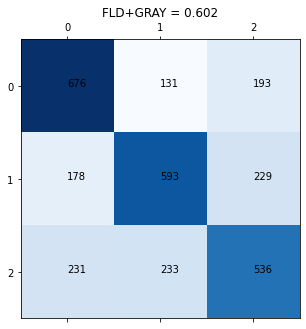

In [59]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/3000
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+GRAY = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

<hr style="border:2px solid black"> </hr>

## Comment on the change of accuracy between RGB and Grayscale
Because the lack of color decreases the information (instead of three color channels grayscale has only one) used in the discrimination thus resulting in an overall worse accuracy.Additionally, in grayscale different colors may result the same color resulting in more confusion.For instance; (R=250,G=0,B=0) and (R=0,G=125,B=125) will yield to the same grayscale color which is (250+0+0)/3.To conclude,Using whether RGB or grayscale depends on the classification objects.In Some classes color bands have no significance while in others like the frog class the color band has much significance.
<hr style="border:2px solid black"> </hr>